In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_path = r"D:\DANE - Contrato\2024\Operativo Barrido\Data"

In [3]:
emicron = pd.read_csv(os.path.join(data_path,"emicron_establecimientos.csv"),header = 0)
emicron22_or = pd.read_csv(os.path.join(data_path,"EMICRON_22.csv"),header = 0)
emicron22 = emicron[emicron['OLA']==2022]
emicron22.columns

Index(['id', 'VENTAS_MES_ANTERIOR', 'POTTOT', 'REMUNERACION_TOTAL', 'CYG',
       'COD_DEPTO', 'CPAM', 'GRUPOS4', 'UBICA', 'IDRUT', 'REG_CONT',
       'CAMCOMER', 'OLA'],
      dtype='object')

In [4]:
emicron22 = pd.merge(emicron22, emicron22_or[['id','GRUPOS12']], on='id')

In [5]:
# Definición labels
dic_depto = {5:"Antioquia",8:"Atlántico",11:"Bogotá, D. C.",13:"Bolívar",15:"Boyacá",17:"Caldas",18:"Caquetá",
             19:"Cauca",20:"Cesar",23:"Córdoba",25:"Cundinamarca",27:"Chocó",41:"Huila",44:"La Guajira",47:"Magdalena",
             50:"Meta",52:"Nariño",54:"Norte De Santander",63:"Quindío",66:"Risaralda",68:"Santander",70:"Sucre",73:"Tolima",
             76:"Valle Del Cauca",88:"San Andrés"}

dic_sector = {2:"Industria",3:"Comercio",4:"Servicios"}

dic_rut = {1:"Sí",0:"No"}

dic_g12 = {3:"Industria",
           4:"Construcción",
           5:"Comercio",
           6:"Transporte y almacenamiento",
           7:"Alojamiento/servicios de comida",
           8:"Información y comunicaciones",
           9:"Actividades inmobiliarias",
           10:"Educación",
           11:"Actividades de salud humana",
           12:"Actividades artiísticas",
}

### Sector Económico

In [16]:
cross_tab_prop = pd.crosstab(index=emicron22['COD_DEPTO'],
                             columns=emicron22['GRUPOS4'],
                             normalize="index")

cross_tab_prop = cross_tab_prop[[3,4,2]]
cross_tab_prop = cross_tab_prop.sort_values(by = 3, ascending=False)

cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

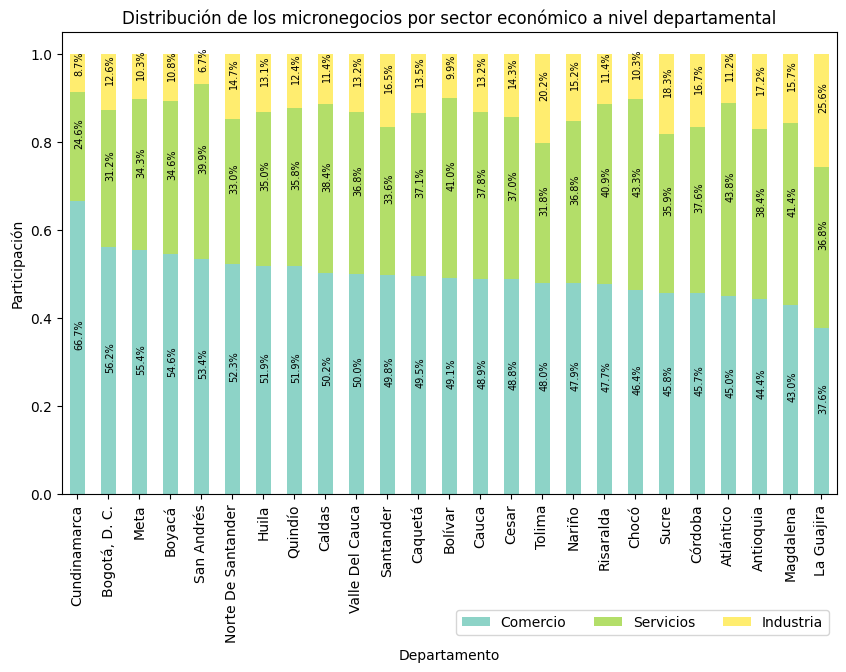

In [17]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="Set3",
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("Distribución de los micronegocios por sector económico a nivel departamental")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=7,
                 rotation = 'vertical')
                 #fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.5, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

In [56]:
cross_tab_prop = pd.crosstab(index=emicron22['COD_DEPTO'],
                             columns=emicron22['GRUPOS12'],
                             normalize="index")

cross_tab_prop = cross_tab_prop[[5,4,6,7,8,9,10,11,12,3]]
cross_tab_prop = cross_tab_prop.sort_values(by = 5, ascending=False)

cross_tab_prop.rename(columns=dic_g12,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

cross_tab_prop

cross_tab_prop.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\grupos12_comp.xlsx",index=True)

In [47]:
pd.crosstab(index=emicron22['GRUPOS4'],
                             columns=emicron22['GRUPOS12'])

GRUPOS12,3,4,5,6,7,8,9,10,11,12
GRUPOS4,,,,,,,,,,
2,3286,0,0,0,0,0,0,0,0,0
3,0,0,11064,0,0,0,0,0,0,0
4,0,80,0,107,3303,186,1135,168,426,3027


### Formalidad

#### Cámara de comercio

In [23]:
cross_tab_prop = pd.crosstab(index=emicron22['COD_DEPTO'],
                             columns=emicron22['CAMCOMER'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[[1,0]]
cross_tab_prop = cross_tab_prop.sort_values(by = 1, ascending=False)
cross_tab_prop

cross_tab_prop.rename(columns=dic_rut,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

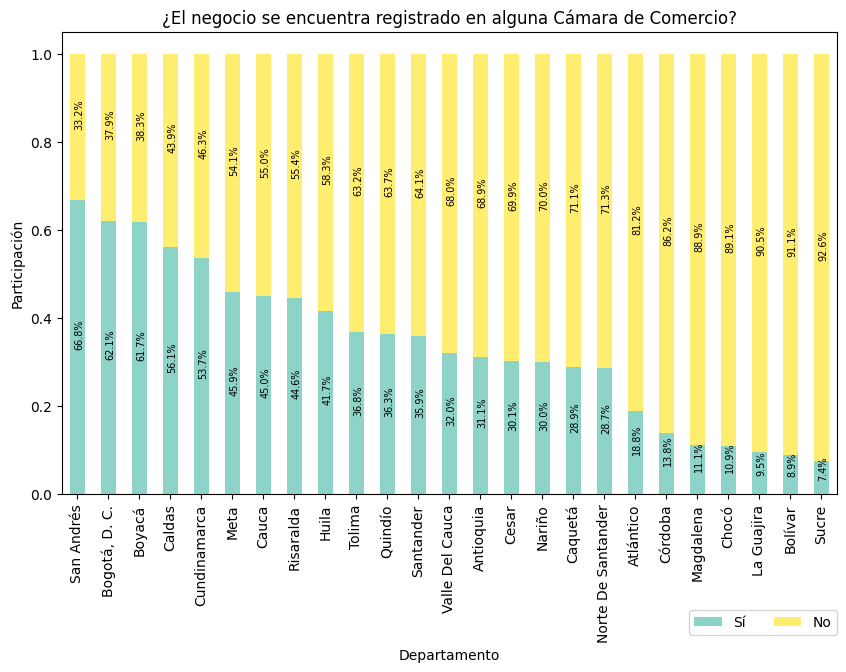

In [31]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="Set3",
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("¿El negocio se encuentra registrado en alguna Cámara de Comercio?")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=7,
                 rotation = 'vertical')
                 #fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

#### RUT

In [36]:
cross_tab_prop = pd.crosstab(index=emicron22['COD_DEPTO'],
                             columns=emicron22['IDRUT'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[[1,0]]
cross_tab_prop = cross_tab_prop.sort_values(by = 1, ascending=False)

cross_tab_prop.rename(columns=dic_rut,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

cross_tab_prop

IDRUT,Sí,No
COD_DEPTO,,
"Bogotá, D. C.",0.794582,0.205418
San Andrés,0.739496,0.260504
Boyacá,0.721986,0.278014
Caldas,0.705081,0.294919
Cundinamarca,0.679612,0.320388
Quindío,0.634738,0.365262
Risaralda,0.555948,0.444052
Santander,0.546326,0.453674
Meta,0.540609,0.459391


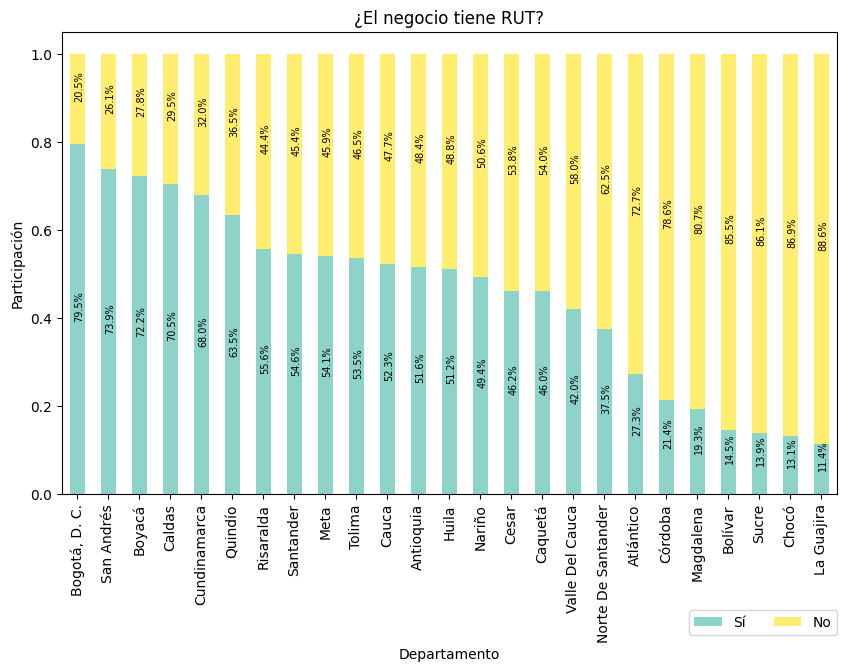

In [37]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap="Set3",
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("¿El negocio tiene RUT?")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=7,
                 rotation = 'vertical')
                 #fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

### Ingresos

(0.0, 8400000.0)

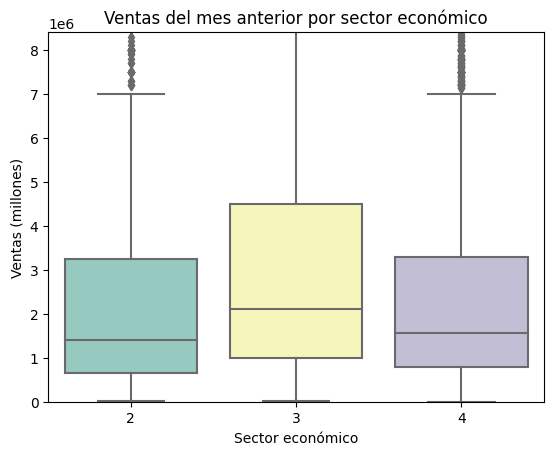

In [129]:
#q1,q3 = emicron22['VENTAS_MES_ANTERIOR'].describe()[[4,6]]
#emicron22_aco = emicron22[emicron22['VENTAS_MES_ANTERIOR'] < q3 + 1.5*(q3-q1)]
#emicron22_aco["GRUPOS4"] = emicron22_aco["GRUPOS4"].map(dic_sector)

sns.boxplot(x = 'GRUPOS4', y = 'VENTAS_MES_ANTERIOR', data = emicron22,
            palette= sns.color_palette("Set3"))
plt.title("Ventas del mes anterior por sector económico")
plt.ylabel("Ventas (millones)")
plt.xlabel("Sector económico")
plt.ylim((0, q3 + 1.5*(q3-q1)))

(0.0, 8000.0)

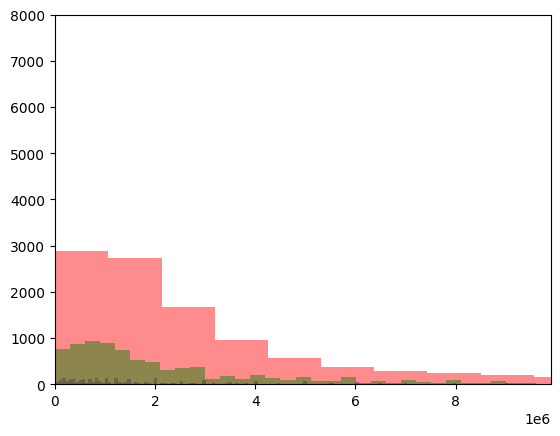

In [128]:
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==2], bins= 1000, alpha = 0.45, color = 'blue')
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==3], bins= 1000, alpha = 0.45, color = 'red')
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==4], bins= 1000, alpha = 0.45, color = 'green')
plt.xlim((0,q3 + 2*(q3-q1)))
plt.ylim((0,8000))

(array([[9.5630e+03, 9.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [3.2133e+04, 1.1900e+02, 2.2000e+01, 7.0000e+00, 3.0000e+00,
         2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00],
        [2.5192e+04, 1.4000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00]]),
 array([2.00000000e+03, 8.84542142e+07, 1.76906428e+08, 2.65358643e+08,
        3.53810857e+08, 4.42263071e+08, 5.30715286e+08, 6.19167500e+08,
        7.07619714e+08, 7.96071928e+08, 8.84524142e+08, 9.72976357e+08,
        1.06142857e+09]),
 <a list of 3 BarContainer objects>)

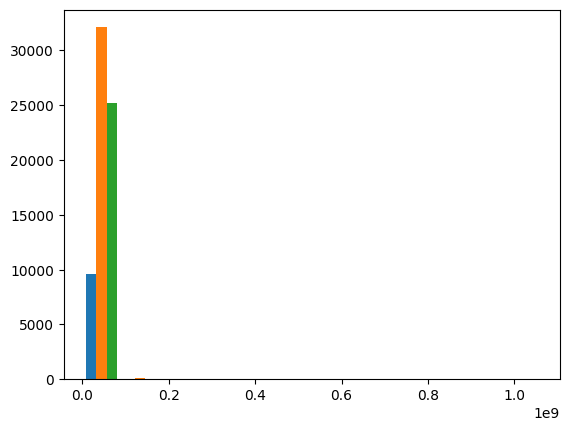

In [147]:
x1 = list(emicron[emicron['GRUPOS4'] == 2]['VENTAS_MES_ANTERIOR'])
x2 = list(emicron[emicron['GRUPOS4'] == 3]['VENTAS_MES_ANTERIOR'])
x3 = list(emicron[emicron['GRUPOS4'] == 4]['VENTAS_MES_ANTERIOR'])

plt.hist([x1, x2, x3], bins = int(180/15))

C:\Users\carlo\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VENTAS_MES_ANTERIOR', ylabel='Density'>

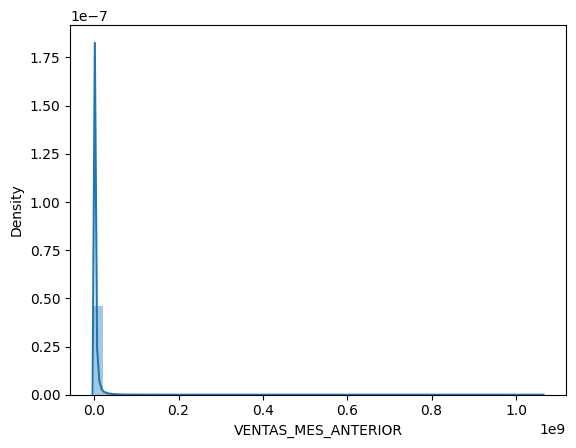

In [141]:
sns.distplot(emicron['VENTAS_MES_ANTERIOR'], norm_hist= True, hist=True, kde=True, label = emicron22["GRUPOS4"])

In [162]:
# Ventas mensuales
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VENTAS_MES_ANTERIOR'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Ventas_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   3.146858e+06  5.255649e+06  3.071800e+06
std    6.454845e+06  1.804048e+07  5.414714e+06
min    4.000000e+03  6.000000e+03  2.000000e+04
25%    8.000000e+05  1.000000e+06  6.500000e+05
50%    1.560000e+06  2.100000e+06  1.400000e+06
75%    3.300000e+06  4.500000e+06  3.250000e+06
max    3.000000e+08  1.061429e+09  6.500000e+07


### Personal empleado

In [163]:
# Personal empleado
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['POTTOT'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Personal_sector.xlsx")

         Servicios      Comercio    Industria
count  8432.000000  11064.000000  3286.000000
mean      0.534037      0.437545     0.542909
std       1.051076      0.860454     1.067786
min       0.000000      0.000000     0.000000
25%       0.000000      0.000000     0.000000
50%       0.000000      0.000000     0.000000
75%       1.000000      1.000000     1.000000
max       8.000000      8.000000     8.000000


In [156]:
emicron22_or[['P3032_1','P3032_2','P3032_3']].sum(axis=1).value_counts()

0.0    69736
1.0    10182
2.0     2822
3.0     1061
4.0      464
5.0      240
6.0      139
8.0       56
7.0       53
dtype: int64

In [152]:
emicron22_or['POTTOT'].shape

(22782,)

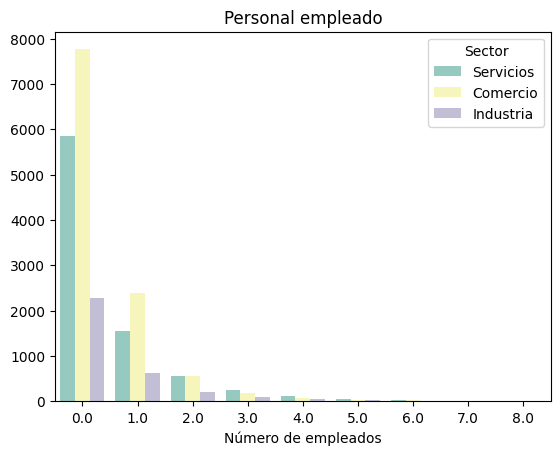

In [46]:
emicron22_c =  emicron22.copy()
emicron22_c['GRUPOS4'] = emicron22_c['GRUPOS4'].map(dic_sector)

sns.countplot(x='POTTOT',hue='GRUPOS4', data= emicron22_c, palette= 'Set3')
plt.title("Personal empleado")
plt.xlabel("Número de empleados")
plt.ylabel("")
plt.legend()

legend = plt.legend()
legend.set_title('Sector')

### Costos y Gastos

In [164]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['CYG'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Costosygastos_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.779523e+06  3.842308e+06  1.998841e+06
std    3.590068e+06  1.370946e+07  7.241953e+06
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.817500e+05  5.400000e+05  2.242500e+05
50%    7.563890e+05  1.320000e+06  6.400000e+05
75%    1.840179e+06  3.160000e+06  1.981500e+06
max    1.149610e+08  7.709100e+08  3.218160e+08


In [165]:
emicron22['id'][emicron22['CYG']==4000]

8344     703918711
14582    714612412
15831    716461412
17072    718285512
17261    718607711
18142    719867511
Name: id, dtype: int64

In [168]:
emicron22_or[emicron22_or['id']==703918711]

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,MES_REF,P3031,...,P3014,P1573_1,P1573_2,P1573_3,P1573_4,P1573_5,P1573_6,P1574,P1771,OLA
30168,7039187,1,1,15,NaN,1,2,65,MAYO,2,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022


### Remuneración Total

In [6]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['REMUNERACION_TOTAL'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Remuneracion_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   4.264664e+05  3.064110e+05  4.623640e+05
std    1.331620e+06  1.149434e+06  1.527814e+06
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    2.400000e+05  0.000000e+00  1.100000e+05
max    2.386000e+07  2.272657e+07  2.354716e+07


### Valor agregado

In [7]:
emicron22['VA'] = emicron22['VENTAS_MES_ANTERIOR'] - emicron22['CYG']
emicron22['VA_rel'] = emicron22['VA'] / emicron22['VENTAS_MES_ANTERIOR']
emicron22['VA_pro'] = emicron22['VA'] / (emicron22['CYG']+1)

In [9]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.367335e+06  1.413340e+06  1.072959e+06
std    4.294435e+06  7.330191e+06  6.522551e+06
min   -3.358500e+07 -2.250850e+08 -3.128160e+08
25%    3.200000e+05  2.970000e+05  2.800000e+05
50%    7.200000e+05  7.180000e+05  6.970000e+05
75%    1.465000e+06  1.413793e+06  1.412859e+06
max    2.555000e+08  2.905186e+08  5.718000e+07


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA'>

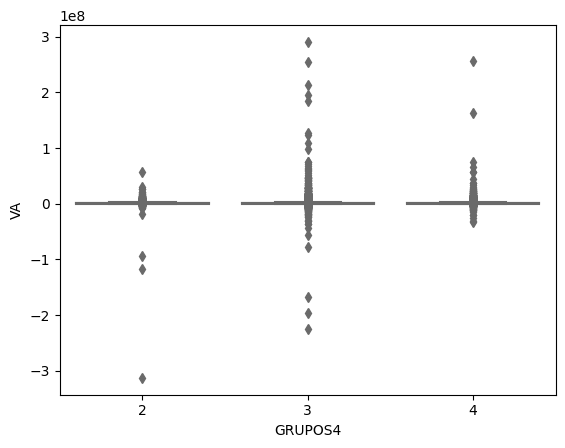

In [12]:
sns.boxplot(x = 'GRUPOS4', y = 'VA', data = emicron22,
            palette= sns.color_palette("Set3"))

In [10]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA_rel'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_rel_sector.xlsx")

         Servicios      Comercio    Industria
count  8432.000000  11064.000000  3286.000000
mean      0.425819      0.275046     0.383801
std       0.731570      1.310642     1.328423
min     -26.000000    -97.863043   -44.585714
25%       0.308826      0.199214     0.333333
50%       0.489160      0.333333     0.500000
75%       0.675000      0.485838     0.672000
max       1.000000      1.000000     1.000000


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA_rel'>

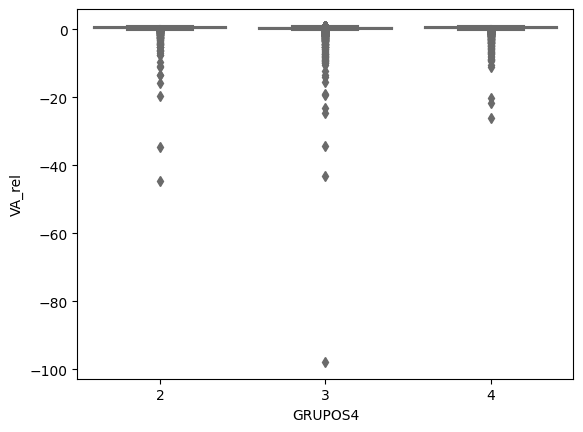

In [13]:
sns.boxplot(x = 'GRUPOS4', y = 'VA_rel', data = emicron22,
            palette= sns.color_palette("Set3"))

In [11]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA_pro'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_pro_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.224101e+04  1.478057e+04  1.352585e+04
std    1.897225e+05  1.629483e+05  1.378914e+05
min   -9.629628e-01 -9.898850e-01 -9.780633e-01
25%    4.468138e-01  2.487730e-01  4.999998e-01
50%    9.575589e-01  4.999988e-01  9.999969e-01
75%    2.076917e+00  9.449103e-01  2.048777e+00
max    1.000000e+07  7.000000e+06  3.800000e+06


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA_pro'>

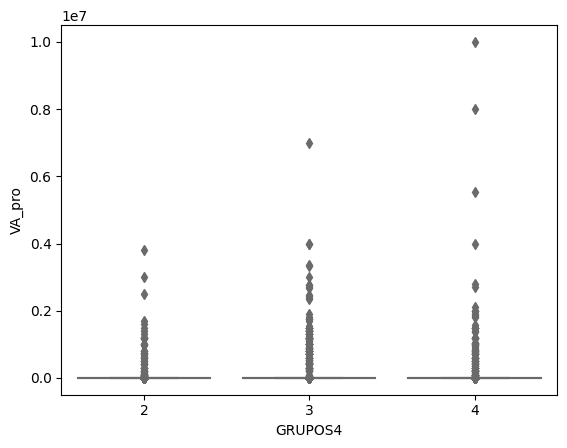

In [14]:
sns.boxplot(x = 'GRUPOS4', y = 'VA_pro', data = emicron22,
            palette= sns.color_palette("Set3"))